## About the project

> This project is my first attempt to conduct Exploratory Data Analysis. For this purpose, I have chosen a dataset from the legendary [Titanic ML competition] (https://www.kaggle.com/c/titanic) on Kaggle. I am going to make some visualizations and build a correlation matrix in order to understand who had the highest chance to survive on a famous ship.

In [1]:
#Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## General information about the dataset

In [31]:
#Let's have a look at the dataset and its shape.

train_data = pd.read_csv('https://raw.githubusercontent.com/korobool/hlll_course/master/tasks/data/titanic/train.csv')
train_data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

In [4]:
#Now let's look at the data types and the missing values. 

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#There are a lot of missing values in columns Age and Cabin.

train_data[['Age', 'Cabin', 'Embarked']].isna().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

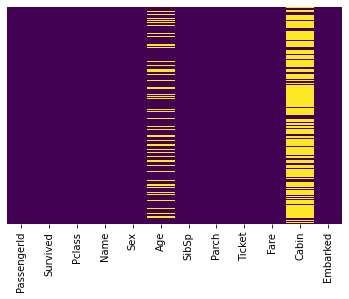

In [6]:
#The heatmap shows us missing values more vividly.

sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [7]:
#Let's check some descriptive statistics. 
#Comparing the mean and the max values we can infer that there are some outliers in columns Fare and Age.

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Understanding target variable

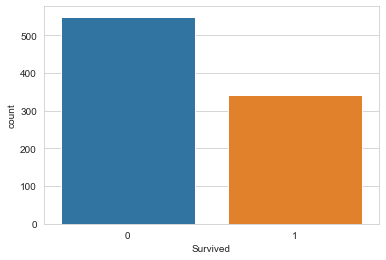

In [8]:
#Let's check the number of survivors and dead people.

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data);

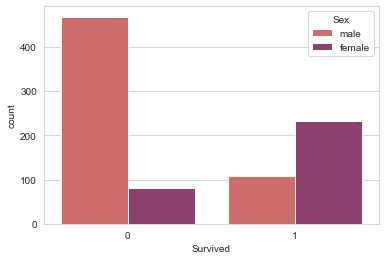

In [9]:
#Unfortunately, we can notice that there are fewer survivors than dead people.
#Let's analyze gender distribution. We can notice that more survivors are among women.

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data,palette='flare');

In [10]:
#Now let's check passenger distribution among classes.
#We see that the majority of passengers bought tickets for the third class.
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

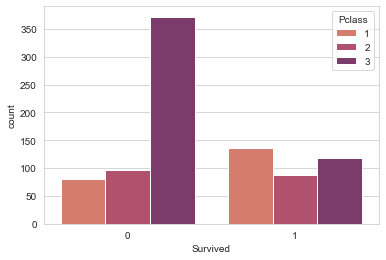

In [11]:
#Now let's look at the class distribution among the survivors and the dead people.

#The highest death rate is among representatives of the third class. 
#And the highest survival rate is among representatives of the first class.

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='flare');


## General Observations

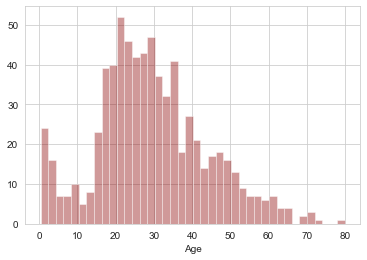

In [12]:
#Let's check what age groups were represented on the ship.
#We can notice that the most common ages on board were from 18 to 36.

sns.distplot(train_data['Age'].dropna(),kde=False,color='darkred',bins=40);


In [13]:
train_data['Age'].value_counts().head(20)

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
32.0    18
35.0    18
27.0    18
26.0    18
16.0    17
31.0    17
20.0    15
34.0    15
33.0    15
23.0    15
Name: Age, dtype: int64

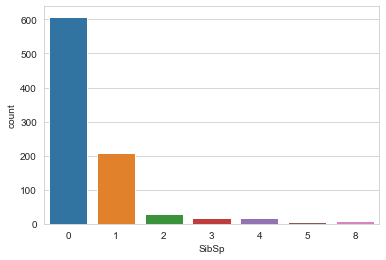

In [14]:
#We see that out of 891 people, more than 600 were on the ship without spouses, brothers, and sisters.

sns.countplot(x='SibSp',data=train_data);

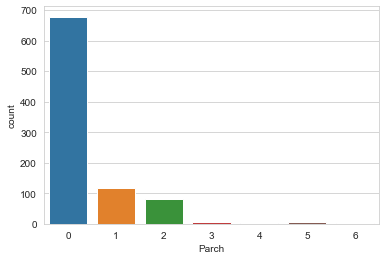

In [15]:
#Also, almost 700 out of 891 people were on the ship without children and parents.

sns.countplot(x='Parch',data=train_data);

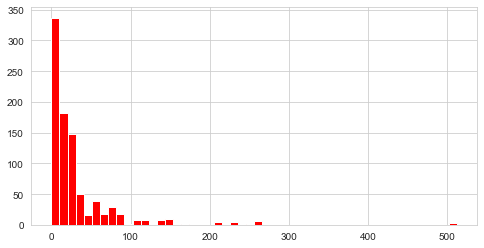

In [16]:
#We already know that the majority of passengers bought tickets for the third class.
#It explains why there are so many cheap tickets.

train_data['Fare'].hist(color='red',bins=50,figsize=(8,4));


In [17]:
#There are only 53 tickets with a price of over 100£.

expensive_tickets = train_data[train_data.Fare >100]
expensive_tickets.shape[0]

53

## Filling missing values

In [18]:
# Firstly, let's delete column Cabin as the majority of its values are missing (687 records).

train_data.drop('Cabin',axis=1,inplace=True)
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
#Now let's fill in the gaps in the Age column with the average values.

train_data.groupby('Pclass').Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [20]:
def fill_missing_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [21]:
train_data['Age'] = train_data[['Age','Pclass']].apply(fill_missing_age,axis=1)

In [23]:
#We can fill 2 missing values in column Embarked with the most frequent values in the column.

train_data = train_data.fillna(train_data.mode().iloc[0])

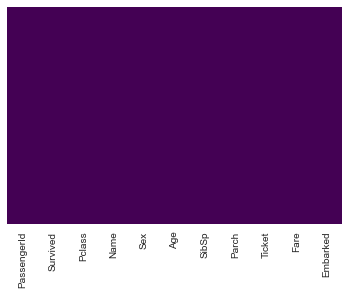

In [25]:
#With the help of this visualization, we can see that all missing values are filled.

sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [ ]:
#Let's check it once again.

count_na = train_data.isna().sum()
count_na

## Correlation Matrix

In [26]:
#Now we are ready to build the correlation matrix.
#Let's transform categorical data into numerical. 

sex = pd.get_dummies(train_data['Sex'], drop_first=False)
embark = pd.get_dummies(train_data['Embarked'], drop_first=False)

train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train_data,sex,embark],axis=1)
train.astype(dtype = 'float')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,1.0
888,889.0,0.0,3.0,25.0,1.0,2.0,23.4500,1.0,0.0,0.0,0.0,1.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,1.0,1.0,0.0,0.0


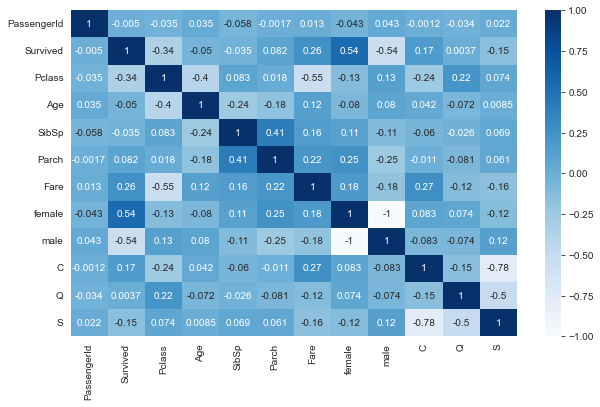

In [27]:
#Let's build a correlation matrix to see the interdependencies between the target variable and other columns.

plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),cmap='Blues',annot=True);

In [30]:
#Now we can find out which columns had the strongest correlations with the target.

max_corr_columns = train.corr()["Survived"].abs().nlargest(5)
max_corr_columns

Survived    1.000000
male        0.543351
female      0.543351
Pclass      0.338481
Fare        0.257307
Name: Survived, dtype: float64

## Conclusion

As we can see with the help of the correlation matrix, the target variable Survived has the strongest correlations with the gender of the passengers. It is a positive correlation in the case of women and a negative in the case of men.